# Проектное задание 2

Базовый анализ данных о серяле "Доктор кто", в промежутке 2005 - 2023 годов.

## Обработка данных

In [452]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
who_directed = pd.read_csv('drwho_directors.csv')
who_episode = pd.read_csv('drwho_episodes.csv')
who_wrote = pd.read_csv('drwho_writers.csv')
who_directed.info()
who_episode.info()
who_wrote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   story_number  175 non-null    object
 1   director      175 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   era              175 non-null    object 
 1   season_number    165 non-null    float64
 2   serial_title     6 non-null      object 
 3   story_number     175 non-null    object 
 4   episode_number   163 non-null    float64
 5   episode_title    175 non-null    object 
 6   type             175 non-null    object 
 7   first_aired      175 non-null    object 
 8   production_code  87 non-null     object 
 9   uk_viewers       175 non-null    float64
 10  rating           175 non-n

>Данные храняться в трех разных наборах, для начала объеденим их:

In [453]:
who_universe = pd.merge(who_episode, who_directed, how = 'left', on = 'story_number')
who_universe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   era              175 non-null    object 
 1   season_number    165 non-null    float64
 2   serial_title     6 non-null      object 
 3   story_number     175 non-null    object 
 4   episode_number   163 non-null    float64
 5   episode_title    175 non-null    object 
 6   type             175 non-null    object 
 7   first_aired      175 non-null    object 
 8   production_code  87 non-null     object 
 9   uk_viewers       175 non-null    float64
 10  rating           175 non-null    int64  
 11  duration         175 non-null    int64  
 12  director         175 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.9+ KB


>Основная тоблиуа и таблица режисеров легко мерджаться поскольку облодают, одинаковым количеством строк и имеют общий ключ

In [454]:
who_wrote.mode()

,story_number,writer
0,200,Steven Moffat
1,201,NaN
2,256,NaN
3,258b,NaN
4,271,NaN
5,279,NaN
6,291,NaN
7,292,NaN
8,293,NaN
9,297d,NaN


>C таблицей авторов сценария все немножко сложнее, как мы видим из иоды в столюце "sory_number" есть повторяющиеся более одного раза значения, посколь этот столбец используется как ключевой для мерджа, мы не можем допускать в нем повторов. Так же можно сделаять вывод что больше всего сценариев для серяла написал Стивен Моффат.

In [455]:
who_wrote[who_wrote['story_number'] == '200']

,story_number,writer
56,200,Russell T Davies
57,200,Gareth Roberts


>Проаерив одну из сери полученых в моде мы можем увидеть что некторые серии были написаны несколькими суенаристами, и поэтому появляются в списке дважды.

In [456]:
bool_arry = [True]
for i in range(1,186):
    if who_wrote.loc[i, 'story_number'] == who_wrote.loc[i-1, 'story_number'] :
        who_wrote.loc[i-1, 'writer'] = who_wrote.loc[i-1, 'writer'] + ' and ' + who_wrote.loc[i, 'writer']
        bool_arry.append(False)
    else:
        bool_arry.append(True)
who_wrote = who_wrote.loc[bool_arry]
who_wrote[who_wrote['story_number'] == '200']

,story_number,writer
56,200,Russell T Davies and Gareth Roberts


>Поскольку оценить вклад каждоо сценариста в отдельную серию, что бы выбрать одного из них, не возможно. Было принято решение считать их как серии написаные дуэтом авторов, их имена будут записанны через 'and'. Теперь их можно обеденить:

In [457]:
who_universe = pd.merge(who_universe, who_wrote, how = 'left', on = 'story_number')
who_universe.head()

,era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration,director,writer
0,revived,1.0,NaN,157,1.0,Rose,episode,2005-03-26,1.1,10.81,76,45,Keith Boak,Russell T Davies
1,revived,1.0,NaN,158,2.0,The End of the World,episode,2005-04-02,1.2,7.97,76,44,Euros Lyn,Russell T Davies
2,revived,1.0,NaN,159,3.0,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80,44,Euros Lyn,Mark Gatiss
3,revived,1.0,NaN,160a,4.0,Aliens of London,episode,2005-04-16,1.4,7.63,82,45,Keith Boak,Russell T Davies
4,revived,1.0,NaN,160b,5.0,World War Three,episode,2005-04-23,1.5,7.98,81,42,Keith Boak,Russell T Davies


>Так же при просмотре информации о данных и таблицы сверху, можно заметить что у нас есть не нужные столбцы и столцы содержащие значения NaN, проверим повторение данных в столюцах и примим решение какие оставить, а какие удалить.

In [458]:
who_universe['era'].value_counts()

era
revived    175
Name: count, dtype: int64

In [459]:
who_universe['serial_title'].value_counts()

serial_title
Flux    6
Name: count, dtype: int64

In [460]:
who_universe['type'].value_counts()

type
episode    153
special     22
Name: count, dtype: int64

In [461]:
who_universe = who_universe.drop(columns=['era', 'serial_title', 'production_code'])
who_universe['first_aired'] = who_universe['first_aired'].astype('datetime64[ns]')
who_universe['season_number'] = who_universe['season_number'].fillna(-1)
who_universe['episode_number'] = who_universe['episode_number'].fillna(-1)

>По итогу было удалено 3 столбца которые содержали неважную информацию или слишком мало информациию, столбец с датой выходв серии смени тип с общего на дату, а знасения NaN оставшихся столбцов были заменены на -1.

In [462]:
who_universe

,season_number,story_number,episode_number,episode_title,type,first_aired,uk_viewers,rating,duration,director,writer
0,1.0,157,1.0,Rose,episode,2005-03-26,10.81,76,45,Keith Boak,Russell T Davies
1,1.0,158,2.0,The End of the World,episode,2005-04-02,7.97,76,44,Euros Lyn,Russell T Davies
2,1.0,159,3.0,The Unquiet Dead,episode,2005-04-09,8.86,80,44,Euros Lyn,Mark Gatiss
3,1.0,160a,4.0,Aliens of London,episode,2005-04-16,7.63,82,45,Keith Boak,Russell T Davies
4,1.0,160b,5.0,World War Three,episode,2005-04-23,7.98,81,42,Keith Boak,Russell T Davies
...,...,...,...,...,...,...,...,...,...,...,...
170,13.0,297e,5.0,Survivors of the Flux,episode,2021-11-28,4.83,77,50,Azhur Saleem,Chris Chibnall
171,13.0,297f,6.0,The Vanquishers,episode,2021-12-05,4.64,76,59,Azhur Saleem,Chris Chibnall
172,-1.0,298,1.0,Eve of the Daleks,special,2022-01-01,4.40,77,58,Annetta Laufer,Chris Chibnall
173,-1.0,299,2.0,Legend of the Sea Devils,special,2022-04-17,3.47,76,48,Haolu Wang,Ella Road and Chris Chibnall


## Работа с данными

<Axes: >

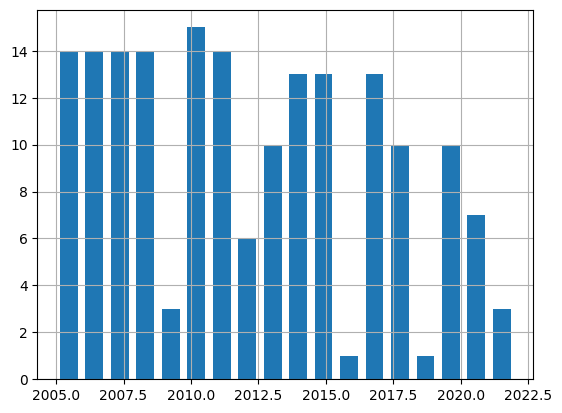

In [463]:
who_universe['first_aired'].dt.year.hist(bins=18, rwidth=0.7)

>Для начала можно оценить в какой год зрители увидели больше всего серий "Доктора Кто", это был 2010г.

>Тепреь перейдем к оценке популярности серяла среди британской аудитории, посмотрим сколько зрителей смотрело каждый из сезонов:

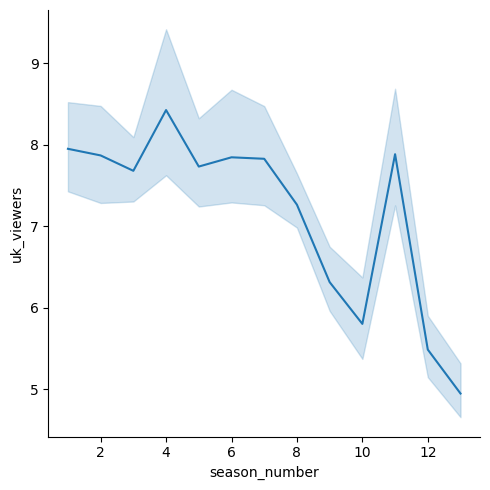

In [464]:
    sns.relplot(y='uk_viewers', x='season_number', data=who_universe.loc[who_universe['season_number']>0, ['season_number', 'uk_viewers']], kind = 'line')

>Не трудно заметить что после 4 по 11 сезон серял постепенно терял зрителей, и даже не смотря на резкий подъем 11 сезона, просмтры 12 упали до рекордно низких. Попробуем установить причину: 

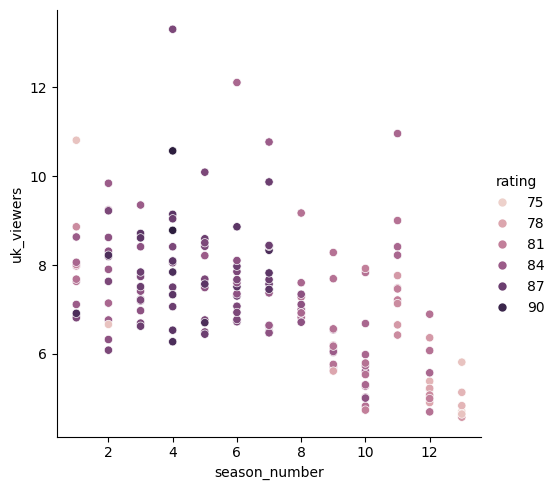

In [465]:
sns.relplot(y='uk_viewers', x='season_number', data=who_universe.loc[who_universe['season_number']>0, ['season_number', 'uk_viewers', 'rating']], hue='rating')

>В диограмме сверху отображены зрительские рэйтинги каждой серии каждого сезона, если опираться на неё то можно сделать прндроложение, что зрители перестали смотреть серял, поскольку серии стали хуже.

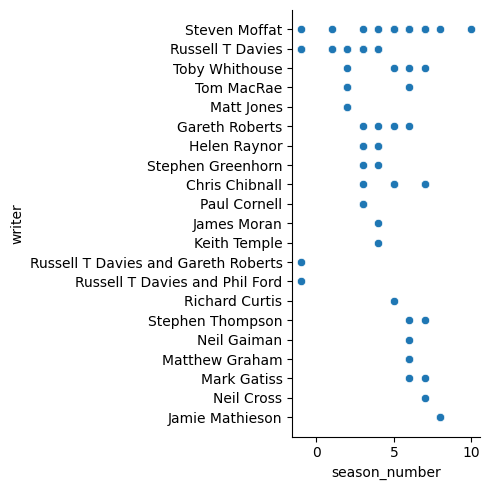

In [466]:
med = who_universe['rating'].median()
sns.relplot(y='writer', x='season_number', data=who_universe.loc[who_universe['rating']>med, ['season_number', 'writer', 'rating']],)

>На данноой диаграмее наблюдаем сценариствов серии которых были оценены выше среденей оценки и сезоны над которыси они работали, не трудно заметить что число "хороших" сценаристов не снижалось вместе с падением рэйтингов серяла, посмотрим обратную диаграмму: 

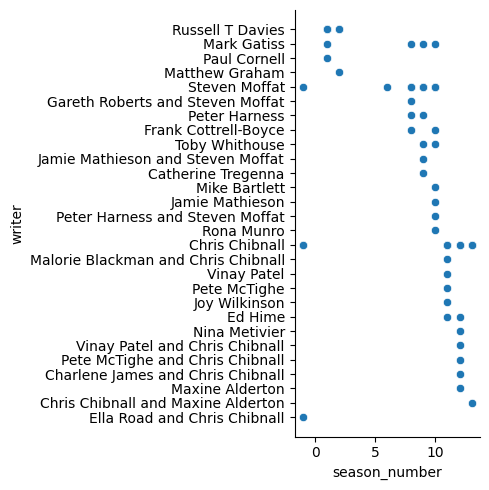

In [467]:
sns.relplot(y='writer', x='season_number', data=who_universe.loc[who_universe['rating']<med, ['season_number', 'writer', 'rating']])

>На этой диаграмме можно увидить что число сценаристов серии которых оценивались ниже среднего увеличивалось, по мере падения рэйтингов серяла. На основе полученных данных можно сделать предположение, что кзаинтересованность в серяле упала в связи с заменой сценаристов на тех которые меньше нравяться зрителям